In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from SES_setup import *
from utils import *
from style import *

SES_setup loaded globally


In [3]:
#import weak_phonons as wp

T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =4
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())
print( PARAMS['H_sub'])

****************************************************************
The operators took 0.8903071880340576 and have dimension 39.
Building the RC Liouvillian took 0.935 seconds.
It is 1521by1521. The full basis would be 2304by2304
It took  0.6587231159210205  seconds to build the Non-secular RWA Liouvillian
Full optical Liouvillian took 0.5869238376617432 seconds.
Chopping reduced the sparsity from 10.104% to 10.104%
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[   0.    0.    0.]
 [   0. 3535.   35.]
 [   0.   35. 3500.]]


In [4]:
# 1 is weak coupling, room temperature, low freq
timelist = np.linspace(0, 3.0, 2000)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print ((init_sys*eig_x).tr())

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))
e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], 
       ops['eig_x'], ops['sigma_y'], ops['eig_y'], ops['OO']]
dat1 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], e_ops=e_ops, progress_bar=True)

dat11 = qt.mesolve(H[1], v0, timelist, c_ops=[L], e_ops=e_ops, progress_bar=True)
save_obj([dat11, PARAMS], '3LS_dynamics_1')

0.44721359549995787
10.0%. Run time:   1.48s. Est. time left: 00:00:00:13
20.0%. Run time:   2.94s. Est. time left: 00:00:00:11
30.0%. Run time:   4.26s. Est. time left: 00:00:00:09
40.0%. Run time:   5.64s. Est. time left: 00:00:00:08
50.0%. Run time:   7.04s. Est. time left: 00:00:00:07
60.0%. Run time:   8.64s. Est. time left: 00:00:00:05
70.0%. Run time:  10.30s. Est. time left: 00:00:00:04
80.0%. Run time:  11.75s. Est. time left: 00:00:00:02
90.0%. Run time:  13.24s. Est. time left: 00:00:00:01
Total run time:  14.67s
10.0%. Run time:   1.42s. Est. time left: 00:00:00:12
20.0%. Run time:   2.90s. Est. time left: 00:00:00:11
30.0%. Run time:   4.32s. Est. time left: 00:00:00:10
40.0%. Run time:   5.80s. Est. time left: 00:00:00:08
50.0%. Run time:   7.27s. Est. time left: 00:00:00:07
60.0%. Run time:   8.89s. Est. time left: 00:00:00:05
70.0%. Run time:  10.62s. Est. time left: 00:00:00:04
80.0%. Run time:  12.21s. Est. time left: 00:00:00:03
90.0%. Run time:  13.79s. Est. time le

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


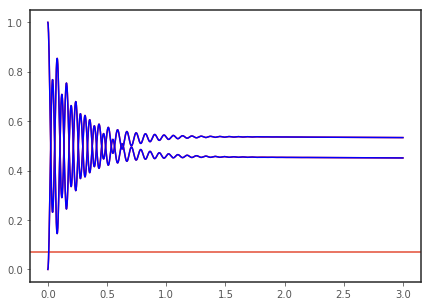

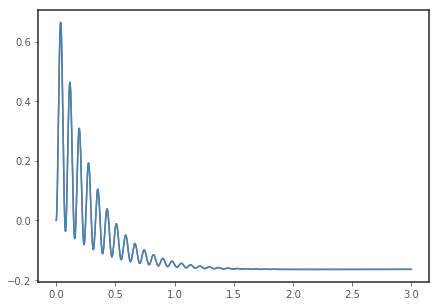

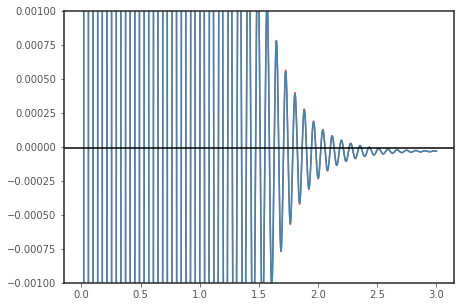

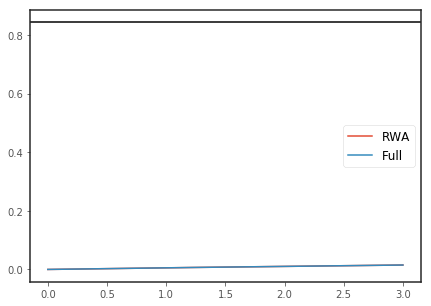

In [5]:
plt.figure(figsize=(7,5))
ss = steadystate(H[1], [L_RWA])
plt.axhline((ss*ops['XO']).tr().real)
plt.plot(timelist, dat1.expect[0], label='RWA' , c='r')
plt.plot(timelist, dat11.expect[0], label='Full', c='b')
plt.plot(timelist, dat1.expect[1], c='r')
plt.plot(timelist, dat11.expect[1], c='b')
plt.figure(figsize=(7,5))
plt.plot(timelist, dat1.expect[2], label='RWA')
plt.plot(timelist, dat11.expect[2], label='Full')
plt.figure(figsize=(7,5))
plt.plot(timelist, dat1.expect[3], label='RWA')
plt.plot(timelist, dat11.expect[3], label='Full')
plt.axhline((ss*ops['eig_x']).tr().real, c='k')
plt.ylim(-0.001,0.001)
plt.figure(figsize=(7,5))
plt.axhline((ss*ops['OO']).tr().real, c='k')
plt.plot(timelist, dat1.expect[6], label='RWA')
plt.plot(timelist, dat11.expect[6], label='Full')
plt.legend()

In [8]:
T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 10.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =5
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())

****************************************************************
The operators took 1.5772359371185303 and have dimension 57.
Building the RC Liouvillian took 1.696 seconds.
It is 3249by3249. The full basis would be 5625by5625
It took  1.2976272106170654  seconds to build the Non-secular RWA Liouvillian
Full optical Liouvillian took 1.093332052230835 seconds.
Chopping reduced the sparsity from 7.005% to 7.005%


In [9]:
print( (steadystate(H[1], [L_RWA])*ops['dark']).tr())
print( (steadystate(H[1], [L])*ops['dark']).tr())

(0.09222538396220979-2.5229008682867344e-23j)
(0.09222538398123971+2.2333876538931747e-23j)


In [10]:
timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print( (init_sys*eig_x).tr())

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat2 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat22 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat22, PARAMS], '3LS_dynamics_2')

0.44721359549995787
10.0%. Run time:   4.67s. Est. time left: 00:00:00:41
20.0%. Run time:   9.62s. Est. time left: 00:00:00:38
30.0%. Run time:  14.46s. Est. time left: 00:00:00:33
40.0%. Run time:  19.30s. Est. time left: 00:00:00:28
50.0%. Run time:  24.06s. Est. time left: 00:00:00:24
60.0%. Run time:  28.89s. Est. time left: 00:00:00:19
70.0%. Run time:  33.45s. Est. time left: 00:00:00:14
80.0%. Run time:  38.10s. Est. time left: 00:00:00:09
90.0%. Run time:  42.66s. Est. time left: 00:00:00:04
Total run time:  47.19s
10.0%. Run time:   4.48s. Est. time left: 00:00:00:40
20.0%. Run time:   8.98s. Est. time left: 00:00:00:35
30.0%. Run time:  14.04s. Est. time left: 00:00:00:32
40.0%. Run time:  19.10s. Est. time left: 00:00:00:28
50.0%. Run time:  24.03s. Est. time left: 00:00:00:24
60.0%. Run time:  28.84s. Est. time left: 00:00:00:19
70.0%. Run time:  33.97s. Est. time left: 00:00:00:14
80.0%. Run time:  39.95s. Est. time left: 00:00:00:09
90.0%. Run time:  45.06s. Est. time le

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


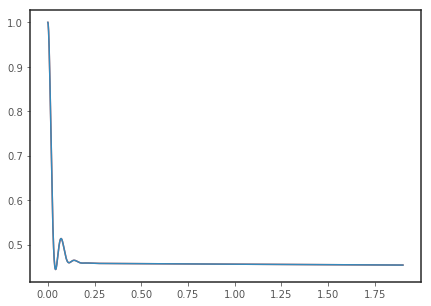

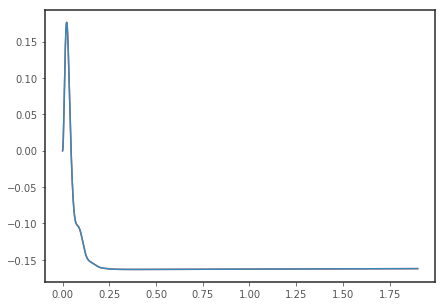

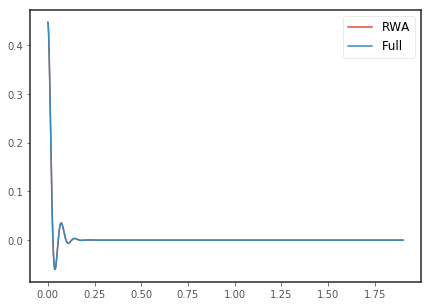

In [11]:
plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[0], label='RWA')
plt.plot(timelist, dat22.expect[0], label='Full')

plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[2], label='RWA')
plt.plot(timelist, dat22.expect[2], label='Full')

plt.figure(figsize=(7,5))
plt.plot(timelist, dat2.expect[3], label='RWA')
plt.plot(timelist, dat22.expect[3], label='Full')

plt.legend()


In [12]:
T_ph = 300.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 40.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())

****************************************************************
The operators took 2.922102928161621 and have dimension 78.
Building the RC Liouvillian took 3.258 seconds.
It is 6084by6084. The full basis would be 11664by11664
It took  2.3315460681915283  seconds to build the Non-secular RWA Liouvillian
Full optical Liouvillian took 2.1476480960845947 seconds.
Chopping reduced the sparsity from 5.454% to 5.454%


In [13]:
print( (steadystate(H[1], [L_RWA])*ops['dark']).tr())
print( (steadystate(H[1], [L])*ops['dark']).tr())

(0.08962157308565813-2.1196503196671334e-23j)
(0.08962157305618781+3.7326525141455374e-23j)


In [14]:
timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print( (init_sys*eig_x).tr())

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat3 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat33 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat33, PARAMS], '3LS_dynamics_3')

0.44721359549995787
10.0%. Run time:  14.86s. Est. time left: 00:00:02:13
20.0%. Run time:  30.15s. Est. time left: 00:00:02:00
30.0%. Run time:  45.59s. Est. time left: 00:00:01:46
40.0%. Run time:  60.85s. Est. time left: 00:00:01:31
50.0%. Run time:  76.22s. Est. time left: 00:00:01:16
60.0%. Run time:  91.49s. Est. time left: 00:00:01:00
70.0%. Run time: 106.99s. Est. time left: 00:00:00:45
80.0%. Run time: 122.59s. Est. time left: 00:00:00:30
90.0%. Run time: 138.05s. Est. time left: 00:00:00:15
Total run time: 153.52s
10.0%. Run time:  17.95s. Est. time left: 00:00:02:41
20.0%. Run time:  35.93s. Est. time left: 00:00:02:23
30.0%. Run time:  53.32s. Est. time left: 00:00:02:04
40.0%. Run time:  71.07s. Est. time left: 00:00:01:46
50.0%. Run time:  89.53s. Est. time left: 00:00:01:29
60.0%. Run time: 107.81s. Est. time left: 00:00:01:11
70.0%. Run time: 124.53s. Est. time left: 00:00:00:53
80.0%. Run time: 141.14s. Est. time left: 00:00:00:35
90.0%. Run time: 157.67s. Est. time le

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


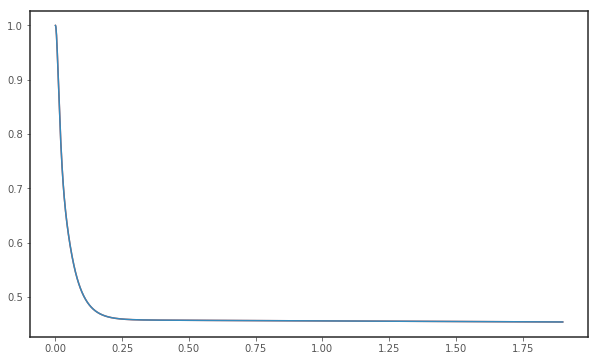

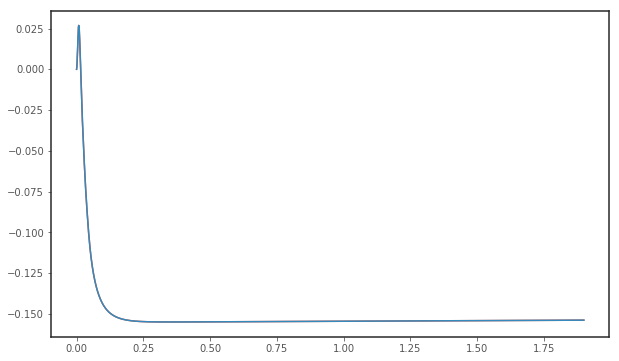

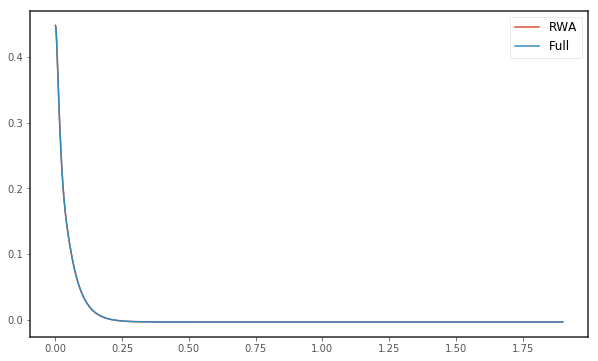

In [15]:
plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[0], label='RWA')
plt.plot(timelist, dat33.expect[0], label='Full')

plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[2], label='RWA')
plt.plot(timelist, dat33.expect[2], label='Full')


plt.figure(figsize=(10,6))
plt.plot(timelist, dat3.expect[3], label='RWA')
plt.plot(timelist, dat33.expect[3], label='Full')

plt.legend()


In [16]:
T_ph = 77.
w_2 = 3500. #1.4*ev_to_inv_cm
bias = w_2*0.01 #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = w_2*0.01 #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 10.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =5
#wc = 50.
w_0 = 100.
Gamma = 2*w_0
T_EM = 2000.

#phonons = np.logspace(-1,np.log10(20),8)

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, V = V, alpha=alpha,
                      T_EM=T_EM, T_ph =T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
#print PARAMS['H_sub'].eigenstates()
H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS,silent=False, threshold=0.)


evals, evecs = exciton_states(PARAMS, shift=False)
dark, bright = evecs[0]*evecs[0].dag(), evecs[1]*evecs[1].dag()
eig_x = (evecs[0]*evecs[1].dag() + evecs[1]*evecs[0].dag())*0.5
ops = make_expectation_operators(PARAMS)
site_x = (site_coherence+site_coherence.dag())


timelist = np.linspace(0, 1.9, 1900)

init_sys = XO_proj
#init_sys = ((XO + OX)*(XO + OX).dag())/2.
#print init_sys
print (init_sys*eig_x).tr()

v0 = tensor(init_sys,qt.enr_thermal_dm([N, N], N, Occupation(w_0, T_ph)))

dat4 = qt.mesolve(H[1], v0, timelist, c_ops=[L_RWA], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)

dat44 = qt.mesolve(H[1], v0, timelist, c_ops=[L], 
                  e_ops=[ops['XO'], ops['OX'], ops['sigma_x'], ops['eig_x'], ops['sigma_y'], ops['eig_y']], 
                  progress_bar=True)
save_obj([dat44, PARAMS], '3LS_dynamics_4')

****************************************************************
The operators took 1.505875825881958 and have dimension 57.
Building the RC Liouvillian took 1.642 seconds.
It is 3249by3249. The full basis would be 5625by5625
It took  1.3065690994262695  seconds to build the Non-secular RWA Liouvillian
Full optical Liouvillian took 1.1349868774414062 seconds.
Chopping reduced the sparsity from 7.005% to 7.005%
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.         0.         0.       ]
 [ 0.         0.4472136 -0.2236068]
 [ 0.         0.         0.       ]]


AttributeError: 'NoneType' object has no attribute 'tr'

# Steadystates as a function of coupling strength

In [37]:
import time
def calculate_RWA_steadystate_comparison(PARAMS, phonons, num, threshold=0.):
    ti =time.time()
    rho_rwa = []
    rho_full = []
    for alpha in phonons:
        PARAMS.update({'alpha_1':alpha, 'alpha_2': alpha})
        #energies, states = exciton_states(PARAMS)
        H, L, L_RWA, PARAMS = get_H_and_L_RWA(PARAMS, silent=True, threshold=threshold)
    
        rho_rwa.append(steadystate(H[1], [L_RWA]))
        rho_full.append(steadystate(H[1], [L]))
        print( alpha)
        #print ss.diag()
    save_obj([rho_rwa, rho_full, PARAMS], 'DATA/SES_validity_ss/3ls_{}'.format(num))
    print ('Calculation complete in {} seconds'.format(time.time() - ti))
    return rho_rwa, rho_full

In [39]:
def plotting_SS(phonons, rho_rwa, rho_full, PARAMS):
    ops = make_expectation_operators(PARAMS)

    f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(12,6))

    ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_rwa], label='RWA')
    ax1.plot(phonons, [(r*ops['OO']).tr() for r in rho_full], label='full')
    #plt.xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
    ax1.set_ylabel(r"GS")
    ax1.set_xlim(phonons[0], phonons[-1])
    ax1.legend()

    ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_rwa], label='RWA')
    ax2.plot(phonons, [(r*ops['dark']).tr() for r in rho_full], label='full')
    #ax2.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
    ax2.set_ylabel(r"DS")
    ax2.legend()


    ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_rwa], label='RWA')
    ax3.plot(phonons, [(r*ops['bright']).tr() for r in rho_full], label='full')
    ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
    ax3.set_ylabel(r"BS")
    ax3.legend()

    ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_rwa], label='RWA')
    ax4.plot(phonons, [(r*ops['eig_x']).tr() for r in rho_full], label='full')
    ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
    ax4.set_ylabel(r"$\tilde{\sigma}_x$")
    ax4.legend()
    plt.show()

# Low $\omega_0$

In [50]:
print( " energy gap of dimer is {}".format(sqrt(bias**2 + 4*V**2)))
print (T_ph*0.695)


 energy gap of dimer is 223.60679774997897
208.49999999999997


In [ ]:
phonons = np.linspace(0.5, 100, 50)
T_ph = 300.
w_2 = 5000. #1.4*ev_to_inv_cm
bias = 100. #0.01*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 100. #0.01*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 0.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3
N =6
#wc = 50.
w_0 = 100.
Gamma = 2*w_0

rho_rwa1 = []
rho_full1 = []

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)


rho_rwa1, rho_full1 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 1,threshold=0)


0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


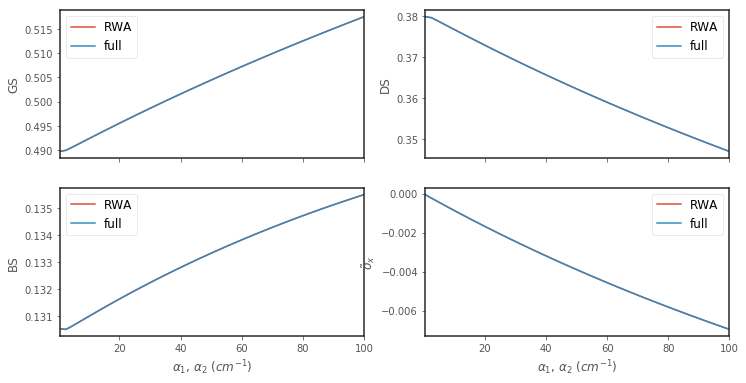

In [40]:
plotting_SS(phonons, rho_rwa1, rho_full1, PARAMS)

# larger $\omega_0$

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 292.5284159183502 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


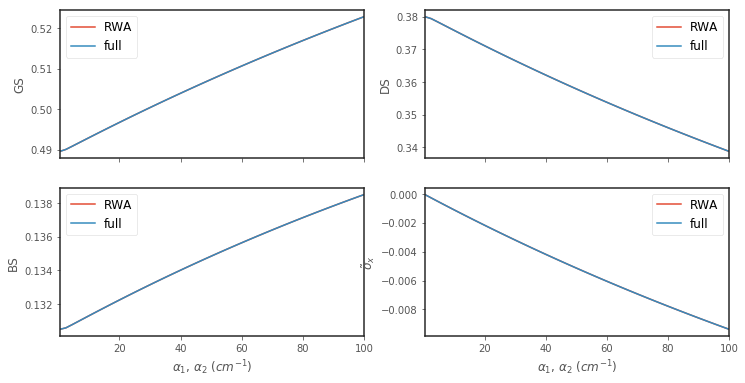

In [51]:
w_0 = 500.
Gamma = 200.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa2, rho_full2 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 2,threshold=0)
plotting_SS(phonons, rho_rwa2, rho_full2, PARAMS)

# Low $T_{ph}$

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 285.0098190307617 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


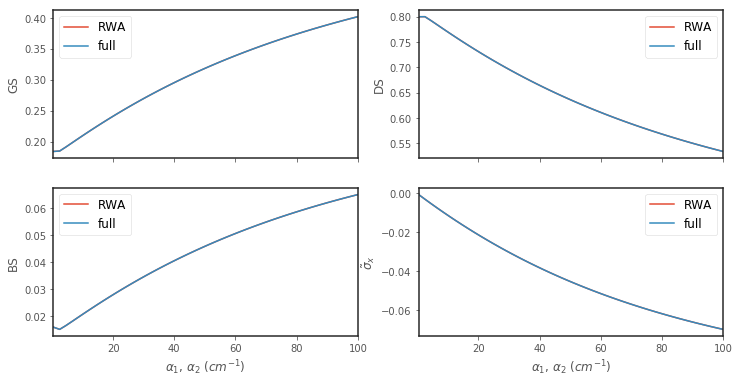

In [41]:
w_0 = 100.
Gamma = 200.
N=5
T_ph = 77.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa3, rho_full3 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 3, threshold=1e-10)
plotting_SS(phonons, rho_rwa3, rho_full3, PARAMS)

# very high $\omega_0$ (underdamped), but not larger than site energy

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 372.46860790252686 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


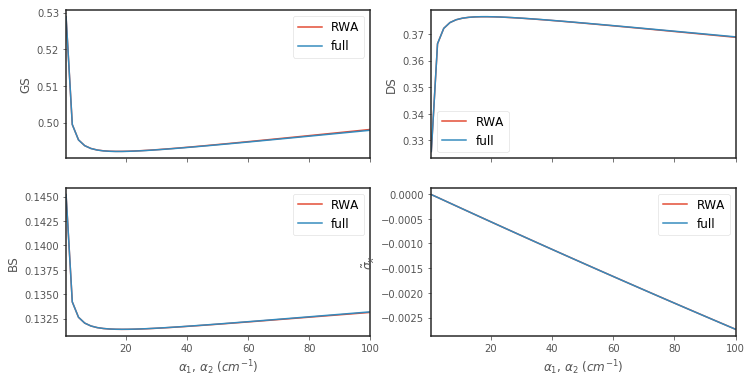

In [43]:
w_0 = 5000.
Gamma = 200.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa4, rho_full4 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 4, threshold=0)
plotting_SS(phonons, rho_rwa4, rho_full4, PARAMS)

# very high $\omega_0$ (overdamped), but not larger than site energy

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 381.90299916267395 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


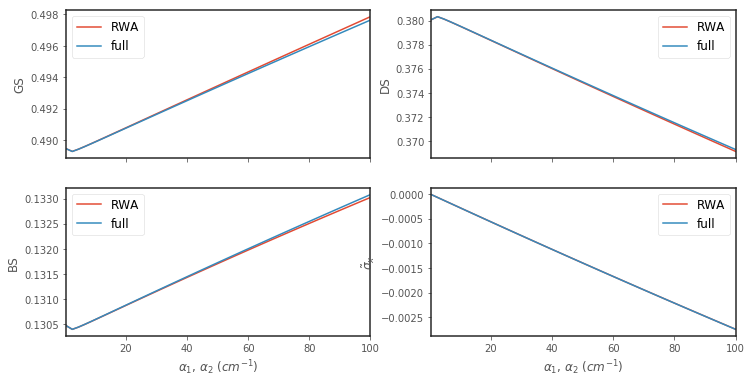

In [44]:
w_0 = 5000. # 
Gamma = (w_0**2)/53.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa5, rho_full5 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 5, threshold=0.)
plotting_SS(phonons, rho_rwa5, rho_full5, PARAMS)

# very high $\omega_0$ (underdamped), LARGER than site energies

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 412.31148290634155 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


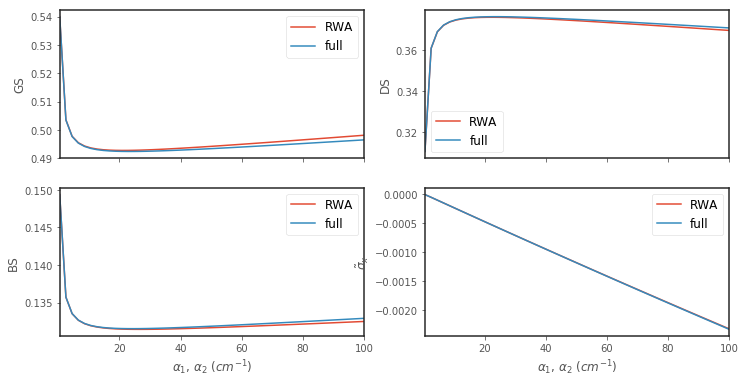

In [46]:
w_0 = 6000. # 
Gamma = 200.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa6, rho_full6 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 6, threshold=0.)
plotting_SS(phonons, rho_rwa6, rho_full6, PARAMS)

# very high $\omega_0$ (overdamped), LARGER than site energies

0.5
2.5306122448979593
4.561224489795919
6.591836734693878
8.622448979591837
10.653061224489797
12.683673469387756
14.714285714285715
16.744897959183675
18.775510204081634
20.806122448979593
22.836734693877553
24.867346938775512
26.89795918367347
28.92857142857143
30.95918367346939
32.98979591836735
35.02040816326531
37.05102040816327
39.08163265306123
41.11224489795919
43.142857142857146
45.173469387755105
47.204081632653065
49.234693877551024
51.26530612244898
53.29591836734694
55.3265306122449
57.35714285714286
59.38775510204082
61.41836734693878
63.44897959183674
65.4795918367347
67.51020408163265
69.54081632653062
71.57142857142858
73.60204081632654
75.63265306122449
77.66326530612245
79.69387755102042
81.72448979591837
83.75510204081633
85.78571428571429
87.81632653061226
89.84693877551021
91.87755102040816
93.90816326530613
95.9387755102041
97.96938775510205
100.0
Calculation complete in 393.91611909866333 seconds


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


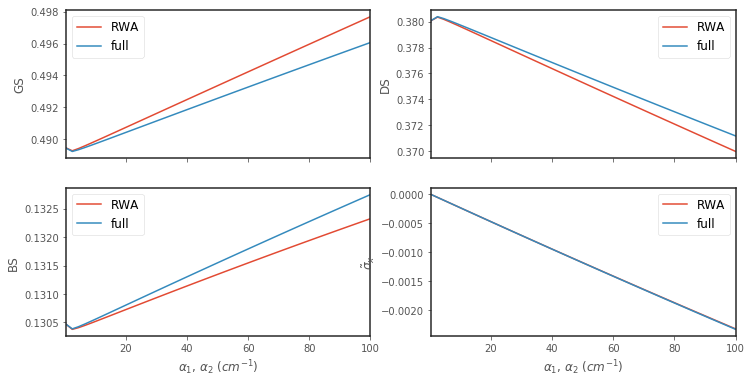

In [45]:
w_0 = 6000. # 
Gamma = (w_0**2)/53.
N=5
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
rho_rwa7, rho_full7 = calculate_RWA_steadystate_comparison(PARAMS, phonons, 7, threshold=0.)
plotting_SS(phonons, rho_rwa7, rho_full7, PARAMS)